In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
from nltk import tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import wordcloud
from scipy import spatial
import gensim
from gensim import corpora
from sklearn.neighbors import BallTree


/home/mitos/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [4]:
import os
import math
fac_keys = list(facilities.keys())
cols = ['Guest_country', 'Room_info', 'Nights_stayed', 'Date of stay', 'Travel_type', 'Review', 'Grade', 'Title', 'Positive']
cols.extend(fac_keys)
print(cols)
all_hotels = pd.DataFrame(columns=cols)
arr = os.listdir('./hotels-with-row-facilities/')
for i in arr:
    if i.endswith('csv'):
        df = pd.read_csv('hotels-with-row-facilities/' + i)
#         print(len(df))
#         l = list(df.columns)
        all_hotels = all_hotels.append(df, ignore_index=True)
    all_hotels.info()
all_hotels.to_csv('all_hotels_row.csv', index=False)


['Guest_country', 'Room_info', 'Nights_stayed', 'Date of stay', 'Travel_type', 'Review', 'Grade', 'Title', 'Positive', 'staff', 'location', 'food/drink', 'dirty', 'bed', 'comfort', 'price', 'bathroom', 'parking', 'restaurant', 'noisiness', 'tv', 'internet', 'fitness', 'covid', 'temperature']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2113 entries, 0 to 2112
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  2113 non-null   object 
 1   Room_info      2113 non-null   object 
 2   Nights_stayed  2113 non-null   object 
 3   Date of stay   2113 non-null   object 
 4   Travel_type    2113 non-null   object 
 5   Review         2113 non-null   object 
 6   Grade          2113 non-null   float64
 7   Title          2113 non-null   object 
 8   Positive       2113 non-null   object 
 9   staff          2113 non-null   object 
 10  location       2113 non-null   object 
 11  food/drink     2113 non

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23163 entries, 0 to 23162
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  23163 non-null  object 
 1   Room_info      23163 non-null  object 
 2   Nights_stayed  23163 non-null  object 
 3   Date of stay   23163 non-null  object 
 4   Travel_type    23163 non-null  object 
 5   Review         23163 non-null  object 
 6   Grade          23163 non-null  float64
 7   Title          23163 non-null  object 
 8   Positive       23163 non-null  object 
 9   staff          23163 non-null  object 
 10  location       23163 non-null  object 
 11  food/drink     23163 non-null  object 
 12  dirty          23163 non-null  object 
 13  bed            23163 non-null  object 
 14  comfort        23163 non-null  object 
 15  price          23163 non-null  object 
 16  bathroom       23163 non-null  object 
 17  parking        23163 non-null  object 
 18  restau

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45367 entries, 0 to 45366
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Guest_country  45367 non-null  object 
 1   Room_info      45367 non-null  object 
 2   Nights_stayed  45367 non-null  object 
 3   Date of stay   45367 non-null  object 
 4   Travel_type    45367 non-null  object 
 5   Review         45367 non-null  object 
 6   Grade          45367 non-null  float64
 7   Title          45367 non-null  object 
 8   Positive       45367 non-null  object 
 9   staff          45367 non-null  object 
 10  location       45367 non-null  object 
 11  food/drink     45367 non-null  object 
 12  dirty          45367 non-null  object 
 13  bed            45367 non-null  object 
 14  comfort        45367 non-null  object 
 15  price          45367 non-null  object 
 16  bathroom       45367 non-null  object 
 17  parking        45367 non-null  object 
 18  restau

In [3]:
facilities = dict()

facilities['staff'] = ['staff', 'service', 'polite', 'rude', 'helpful', 'friendly', 'employee', 'reception']
facilities['location'] = ['view', 'location', 'place', 'victoria', 'sighting', 'airport', 'area', 'central', 'centre',
                          'city', 'near']
facilities['food/drink'] = ['meal', 'breakfast', 'lunch', 'brunch', 'dinner', 'plate', 'dish', 'hungry', 'food', 'drink', 'soda', 'coffee', 'tea']
facilities['dirty'] = ['clean', 'dirty', 'filthy', 'dust', 'cleanliness']
facilities['bed'] = ['bed', 'sheet', 'pillow', 'mattress', 'sleep']
facilities['comfort'] = ['comfort', 'comfortable', 'comfy', 'decor', 'modern', '']
facilities['price'] = ['price', 'expensive', 'cheap', 'money', 'pricey', 'paid']
facilities['bathroom'] = ['towel', 'shower', 'toilet', 'bath', 'water', 'bath', 'bathroom']
facilities['parking'] = ['car', 'parking']
facilities['restaurant'] = ['restaurant', 'menu', 'bar']
facilities['noisiness'] = ['loud', 'quiet', 'noisy', 'noise', 'sound', 'quiet']
facilities['tv'] = ['television', 'tv', 'screen', 'programm']
facilities['internet'] = ['wifi', 'signal', 'download', 'network', 'internet']
facilities['fitness'] = ['gym', 'fitness', 'spa', 'workout', 'pool']
facilities['covid'] = ['covid', 'covid19', 'virus']
facilities['temperature'] = ['air', 'conditioning', 'heating', 'temperature']

# facilities['heating'] = ['air', 'service', 'polite', 'rude', 'helpfull', 'friendly']


TypeError: can only concatenate str (not "float") to str

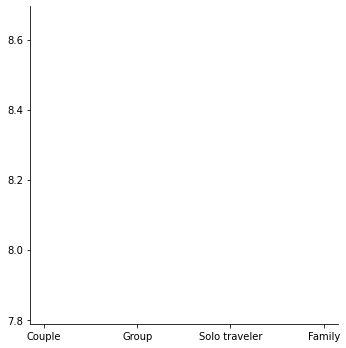

In [5]:

sns.lmplot(data=all_hotels, x="Travel_type", y="Grade", x_jitter=.5)

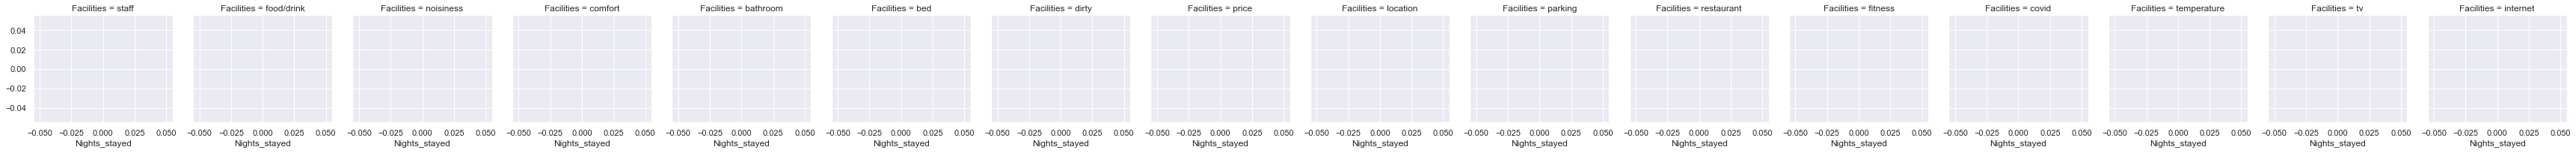

In [68]:
g = sns.FacetGrid(all_hotels, col="Facilities", hue="Positive")
g.map(sns.scatterplot, "Nights_stayed")

In [20]:
all_hotels = pd.read_csv("all_hotels_row.csv")
all_hotels = all_hotels.drop(['Review'], axis = 1)
all_hotels = all_hotels.drop(['Title'], axis = 1)
# all_hotels.info()
all_hotels['Room_info'] = all_hotels['Room_info'].str.replace(' \(\d Adults\)', '')
all_hotels = all_hotels.rename(columns={'Date of stay': 'Date'})
all_hotels['Date'] = pd.to_datetime(all_hotels['Date'],format='%B %Y')

In [21]:
len(all_hotels.Room_info.unique())

91

In [22]:
all_hotels["Date of stay"] = all_hotels['Date of stay'].str[:-5]
all_hotels

KeyError: 'Date of stay'

In [8]:
# all_hotels["Date"] = pd.to_datetime(all_hotels['Date'])
all_hotels = all_hotels.sort_values(by="Date")
all_hotels

,Guest_country,Room_info,Nights_stayed,Date,Travel_type,Grade,Positive,staff,location,food/drink,...,price,bathroom,parking,restaurant,noisiness,tv,internet,fitness,covid,temperature
41836,United Kingdom,Standard Room,3,2018-07-01,Couple,5.4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16809,United Kingdom,Superior Double Room,1,2018-07-01,Couple,10.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
40048,United Kingdom,Standard Room,1,2018-07-01,Couple,4.2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40054,United Kingdom,Standard Room,1,2018-07-01,Couple,4.6,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23151,United Kingdom,Superior Double Room,1,2018-07-01,Couple,5.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33110,United Kingdom,Standard Room,2,2021-03-01,Solo traveler,7.0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
33109,United Kingdom,Standard Room,2,2021-03-01,Couple,7.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
33108,France,Standard Room,1,2021-03-01,Couple,6.0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
17619,South Sudan,Standard Room,5,2021-03-01,Solo traveler,8.0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [12]:
new_f = new_f.groupby('Room_info').filter(lambda x : len(x)>300)

In [11]:
new_f = all_hotels.groupby('Guest_country').filter(lambda x : len(x)>500)

In [13]:
new_f.reset_index()
new_f

,Guest_country,Room_info,Nights_stayed,Date,Travel_type,Grade,Positive,staff,location,food/drink,...,price,bathroom,parking,restaurant,noisiness,tv,internet,fitness,covid,temperature
41836,United Kingdom,Standard Room,3,2018-07-01,Couple,5.4,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
16809,United Kingdom,Superior Double Room,1,2018-07-01,Couple,10.0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
40048,United Kingdom,Standard Room,1,2018-07-01,Couple,4.2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40054,United Kingdom,Standard Room,1,2018-07-01,Couple,4.6,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
23151,United Kingdom,Superior Double Room,1,2018-07-01,Couple,5.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27436,United Kingdom,Standard Room,1,2021-03-01,Solo traveler,10.0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0
37919,United Kingdom,Superior Room with River view,3,2021-03-01,Solo traveler,9.0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
33110,United Kingdom,Standard Room,2,2021-03-01,Solo traveler,7.0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
33109,United Kingdom,Standard Room,2,2021-03-01,Couple,7.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [14]:
l = new_f['Guest_country'].factorize()
new_f['Guest_country'] = l[0]
# # all_hotels['Travel_type'].cat.codes
# # all_hotels.head()
l

(array([0, 0, 0, ..., 0, 0, 0]),
 Index(['United Kingdom', 'United States of America', 'Saudi Arabia',
        'Australia', 'Ireland', 'United Arab Emirates'],
       dtype='object'))

In [15]:
l = new_f['Room_info'].factorize()
new_f['Room_info'] = l[0]
# # all_hotels['Travel_type'].cat.codes
# # all_hotels.head()
l

(array([0, 1, 0, ..., 0, 0, 6]),
 Index(['Standard Room', 'Superior Double Room', 'Superior Twin Room',
        'Studio Double (Family)', 'Standard Double or Twin Room',
        'Superior King Room', 'Superior Double Room - Disability Access',
        'Superior Double Room with Internal View', 'Studio King (Family)',
        'King Studio', 'Premium Room', 'Superior Room',
        'Superior Room with Runway View', 'Executive Double Room - River View',
        'Executive Double Room', 'Standard Double Room - Atrium View',
        'Premium Room with River View', 'Superior Twin Room with Internal View',
        'Single Room', 'Superior Room with River view',
        'Studio Double Room with London Eye View'],
       dtype='object'))

In [16]:
all_hotels = all_hotels.loc[(all_hotels['Facilities'] == 'fitness') | (all_hotels['Facilities'] ==  'food/drink') |( all_hotels['Facilities'] ==  'location')]
all_hotels

KeyError: 'Facilities'

TypeError: invalid type promotion

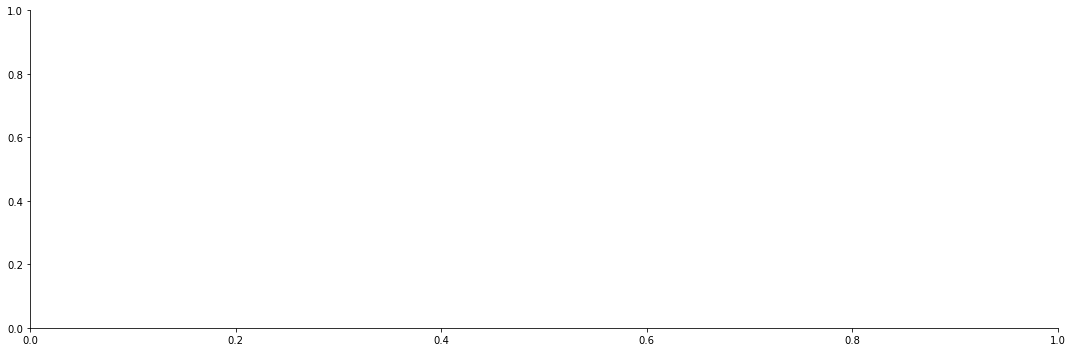

In [17]:
# sns.catplot(x="Travel_type", y="Nights_stayed",hue="food/drink", kind='violin', data=all_hotels, aspect=15/8)
sns.catplot(x = "Date", y = "Guest_country", kind = 'violin', hue="Positive",split="True",data = all_hotels, aspect=12/4);
plt.show()

/home/mitos/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


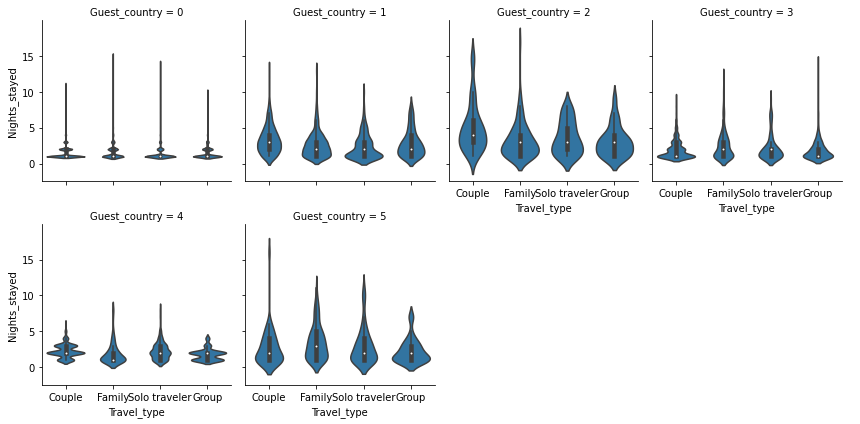

In [18]:
# families most frequent in August
g = sns.FacetGrid(new_f, col="Guest_country", col_wrap=4)
g.map(sns.violinplot, "Travel_type","Nights_stayed", data=new_f)
g.add_legend()
# sns.catplot(x="Date of stay", col="Nights_stayed", hue="Travel_type", kind="count", palette="ch:.25", data=all_hotels, aspect=10/5)

TypeError: 'NoneType' object is not iterable

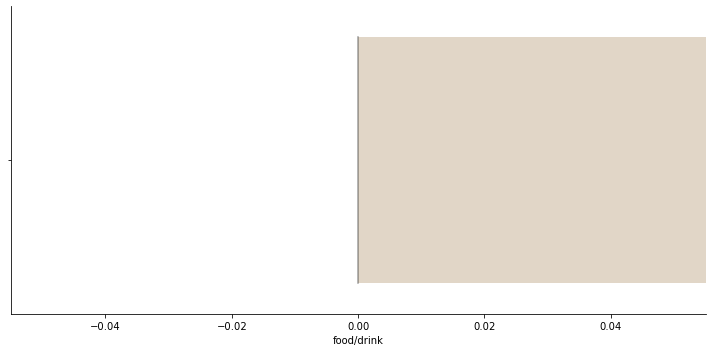

In [19]:
sns.catplot(x="food/drink", hue="price", kind="boxen", palette="ch:.25", data=new_f, aspect=10/5)

In [136]:
new_df1 = new_f.iloc[:, 5:10]
new_df1.head()

,Grade,Positive,staff,location,food/drink
48494,10.0,0,0,0,0
32158,8.3,0,0,0,0
32156,8.3,0,0,1,1
32151,9.6,0,0,0,0
32147,8.8,0,1,0,0


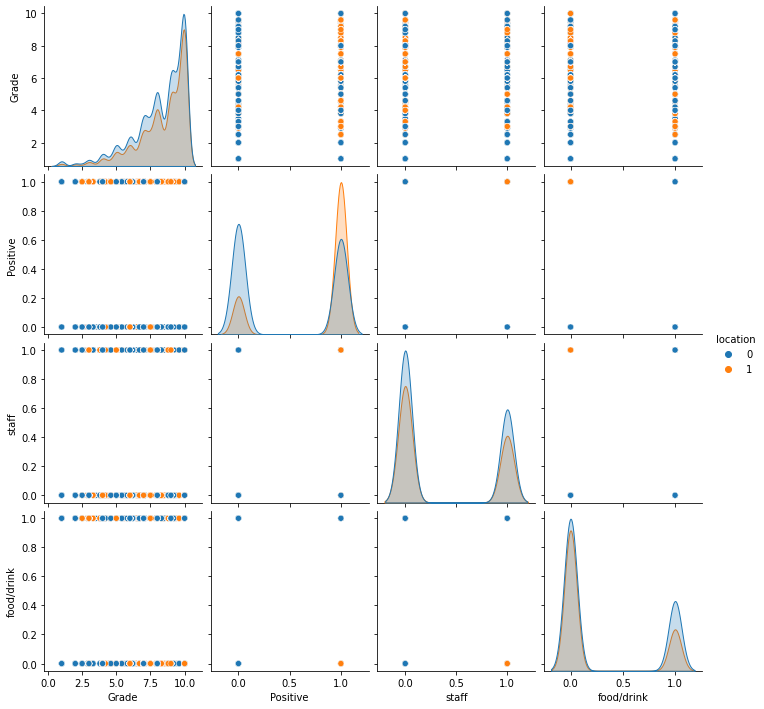

In [137]:
sns.pairplot(hue="location",data=new_df1)

<AxesSubplot:xlabel='Guest_country', ylabel='Count'>

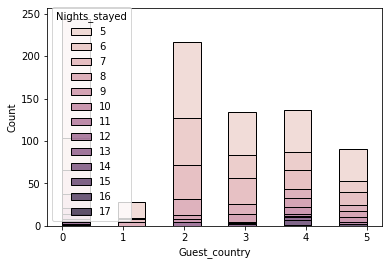

In [72]:
new_f_ns = new_f.loc[new_f['Nights_stayed'] >= 5]

sns.histplot(x="Guest_country", hue="Nights_stayed", multiple ="stack",data=new_f_ns)


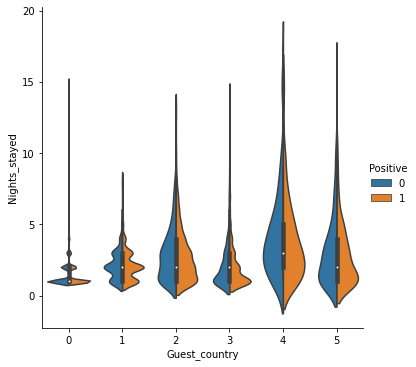

In [50]:
new_f_p = new_f.loc[new_f['noisiness'] == 1]
sns.catplot(x="Guest_country", y="Nights_stayed", hue="Positive",kind="violin", split=True,data=new_f)

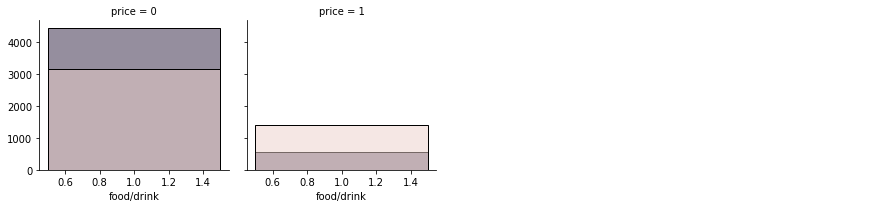

In [19]:
g = sns.FacetGrid(new_f, col="price", col_wrap=4)
g.map(sns.histplot,"food/drink", hue="Positive",data=new_f_p)
g.add_legend()
plt.show()
# show percentage of 

<AxesSubplot:xlabel='Guest_country', ylabel='Count'>

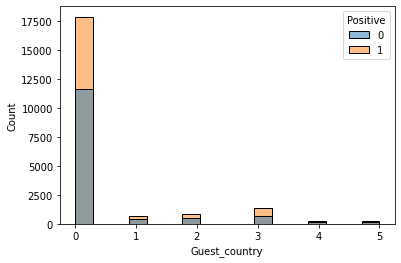

In [43]:
sns.histplot(x="Guest_country", hue="Positive",data=new_f)

In [75]:
new_f_l = new_f.loc[ (new_f['Room_info'].str.contains('Exec'))]
plt.figure(figsize=(15,8))
sns.histplot(x="Date", hue="internet", multiple="stack", stat="count", data=new_f)
# show percentage of 

AttributeError: Can only use .str accessor with string values!

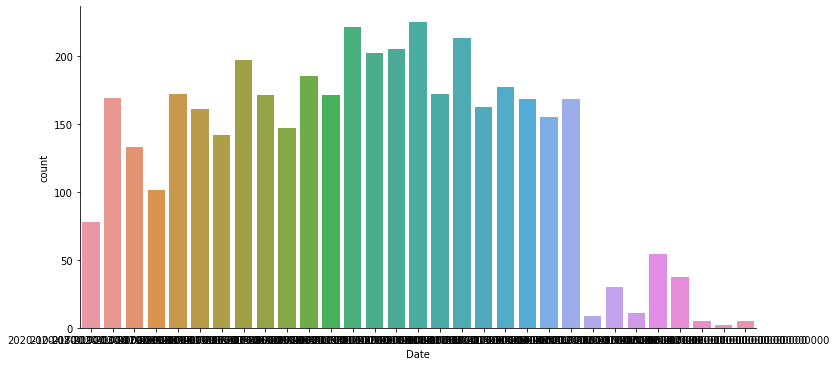

In [37]:
new_f_l = new_f.loc[new_f['restaurant'] == 1]
# print(new_f_l.Room_info.unique())
sns.catplot(x="Date", kind="count", data=new_f_l, aspect=14/6)
# show percentage of 

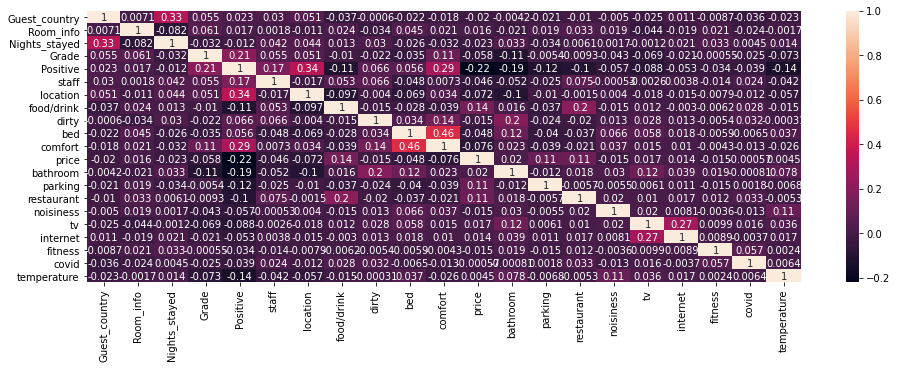

In [38]:
import matplotlib.pyplot as plt
corr = new_f.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=True)
plt.show()

In [68]:
len(new_f)

43961

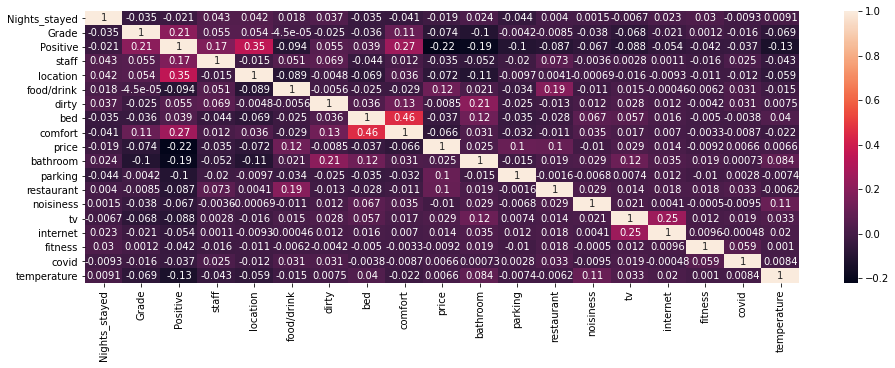

In [39]:
import matplotlib.pyplot as plt
corr = all_hotels.corr()
plt.figure(figsize = (16,5))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
df = all_hotels[['Room_info','Date of stay','Guest_country','Facilities']]

sns.pairplot(data=df, kind="scatter")
plt.show()

In [33]:
sns.heatmap(all_hotels)

ValueError: could not convert string to float: 'Kuwait'

In [322]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(all_hotels.Facilities, all_hotels.Travel_type))

(420.4907875642115,
 1.9939231779224118e-62,
 45,
 array([[ 2975.6177041 ,  1354.95081787,   780.77839682,   995.6530812 ],
        [ 4041.71423867,  1840.39905588,  1060.51364036,  1352.3730651 ],
        [ 4490.46876715,  2044.73992754,  1178.26325612,  1502.52804918],
        [  392.72111831,   178.82599627,   103.04689501,   131.40599041],
        [ 4180.5796465 ,  1903.63157317,  1096.95081787,  1398.83796245],
        [ 1150.39027336,   523.83148534,   301.85324953,   384.92499177],
        [ 6583.19482563,  2997.66505654,  1727.37791378,  2202.76220405],
        [  392.23387126,   178.60412779,   102.91904527,   131.24295568],
        [10554.25824276,  4805.89318257,  2769.35334102,  3531.49523365],
        [ 1574.29520255,   716.85706444,   413.08252827,   526.76520474],
        [  788.85296593,   359.20507191,   206.98873824,   263.95322392],
        [ 3002.41629158,  1367.15358437,   787.81013284,  1004.61999122],
        [ 2736.37940498,  1246.01339335,   718.0041717 ,   915

In [319]:
pd.crosstab(all_hotels.Facilities, all_hotels.Travel_type)


Travel_type,Couple,Family,Group,Solo traveler
Facilities,,,,
bathroom,2960,1257,855,1035
bed,4186,1709,1135,1265
comfort,4589,1900,1238,1489
covid,408,205,66,127
dirty,4150,1933,1111,1386
fitness,1165,606,244,346
food/drink,6540,3174,1658,2139
internet,316,171,101,217
location,10498,5048,2668,3447
